## Storm Tracks for Alaska between 1979-2015

In [26]:
import warnings;warnings.filterwarnings("ignore")
import sys,getopt
import pandas as pd;import numpy as np
import pathlib as pl;import xarray as xr
import datetime;import json
from pyproj import Proj, transform,Transformer
import matplotlib.pyplot as plt;
import matplotlib as mpl;
import cartopy as cart;import cartopy.crs as ccrs
from pyproj.crs import BoundCRS, Ellipsoid, GeographicCRS, ProjectedCRS
import folium;from shapely import Polygon,Point
from random import randint; import requests

##### Initialize Path
---

In [2]:
root = pl.Path('/Users/tmiesse/work/FHRL/arctic/climate_data/era_interim/tracks')
# Load in csv file that was generated from cyclone tracking
file = pd.read_csv(root / 'Post_processed_cyclones_MPI_ESM1_2_HR_historical.csv')

#### Find each cyclone through a unique Identifier and then dump into a Dictionary
---

In [3]:
keys = file['Cyc_ID'].unique()
storm = {'track':[]}
for k in range(0,len(keys)):
    idx = file.index[np.where(file['Cyc_ID']==keys[k])]
    tracks= {'id':[],'lat':[],'lon':[],'time':[]}
    count = 0
    for i in idx:
        if count<1:
            days = pd.to_datetime(file['Time'][idx[-1]])-pd.to_datetime(file['Time'][idx[1]])            
        if days.days>2:
            tracks['id'].append(file['Cyc_ID'][i])
            tracks['lat'].append(file['Lat'][i])
            if file['Lon'][i]>0:
                lons = file['Lon'][i]-360
            else:
                lons = file['Lon'][i]
            tracks['lon'].append(lons)
            tracks['time'].append(pd.to_datetime(file['Time'][i]))
        count+=1
    if len(tracks['id'])<2:
        pass
    else:
        storm['track'].append(tracks)

#### Plot the tracks for all available time in Alaska
---

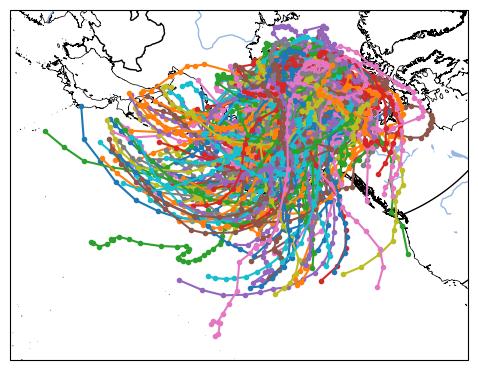

In [4]:

# map boundary ------------------------------------------------------------------------
lat1,lat2 = 25,90
lon1,lon2 = -240,-120

# -------------------------------------------------------------------------------------
plt.rcParams["font.family"] = "Times New Roman"
fig = plt.figure(figsize=(6,5))
proj = ccrs.NorthPolarStereo(central_longitude=-145)
ax1= plt.axes([0,0.,0.9,0.7],projection=proj)
cmap = mpl.cm.get_cmap('jet')
fig.tight_layout(pad=0.75)

# Filter Parameters -------------------------------------------------------------------
# Datetime Filters
start = 1979
end   = 2015
# Bounding Box Filters
xmin,xmax = -220,-120
ymin,ymax = 20,90

# Apply Filters and Plot tracks--------------------------------------------------------
for t in storm['track']:
    noaa = None
    if start <= pd.to_datetime(t['time'][1]).year < end:
        bbox1 = Polygon([[xmin,ymin],[xmax,ymin],[xmax,ymax],[xmin,ymax]])
        if ((bbox1.contains(Point(t['lon'][1],t['lat'][1])))&(bbox1.contains(Point(t['lon'][-1],t['lat'][-1])))):
            ax1.plot(t['lon'],t['lat'],'.-',transform = ccrs.PlateCarree(),\
                    label=f"{pd.to_datetime(t['time'][1]).year} - {pd.to_datetime(t['time'][1]).month_name()}")

#ax1.legend(loc='lower center', bbox_to_anchor=(1.36, 0.9),ncol=2,frameon=False,fontsize=12)
# subplot adjustment -----------------------------------------------------------


ax1.set_extent([lon1, lon2, lat1, lat2], crs=ccrs.PlateCarree())
ax1.coastlines(resolution='10m',linewidth=0.5)
ax1.add_feature(cart.feature.LAKES)
ax1.add_feature(cart.feature.RIVERS, linestyle="-")
ax1.add_feature(cart.feature.BORDERS.with_scale("50m"), linestyle="-")

plt.show(fig)

#### Plot the tracks for 2000-2005 in Alaska
---

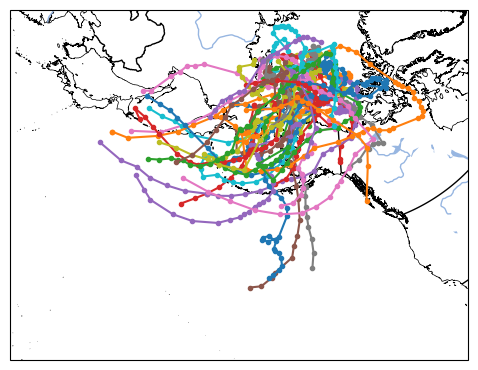

In [5]:

# map boundary ------------------------------------------------------------------------
lat1,lat2 = 25,90
lon1,lon2 = -240,-120

# -------------------------------------------------------------------------------------
plt.rcParams["font.family"] = "Times New Roman"
fig = plt.figure(figsize=(6,5))
proj = ccrs.NorthPolarStereo(central_longitude=-145)
ax1= plt.axes([0,0.,0.9,0.7],projection=proj)
cmap = mpl.cm.get_cmap('jet')
fig.tight_layout(pad=0.75)

# Filter Parameters -------------------------------------------------------------------
# Datetime Filters
start = 2000
end   = 2005
# Bounding Box Filters
xmin,xmax = -220,-120
ymin,ymax = 20,90

# Apply Filters and Plot tracks--------------------------------------------------------
for t in storm['track']:
    noaa = None
    if start <= pd.to_datetime(t['time'][1]).year < end:
        bbox1 = Polygon([[xmin,ymin],[xmax,ymin],[xmax,ymax],[xmin,ymax]])
        if ((bbox1.contains(Point(t['lon'][1],t['lat'][1])))&(bbox1.contains(Point(t['lon'][-1],t['lat'][-1])))):
            ax1.plot(t['lon'],t['lat'],'.-',transform = ccrs.PlateCarree(),\
                    label=f"{pd.to_datetime(t['time'][1]).year} - {pd.to_datetime(t['time'][1]).month_name()}")

#ax1.legend(loc='lower center', bbox_to_anchor=(1.36, 0.9),ncol=2,frameon=False,fontsize=12)
# subplot adjustment -----------------------------------------------------------


ax1.set_extent([lon1, lon2, lat1, lat2], crs=ccrs.PlateCarree())
ax1.coastlines(resolution='10m',linewidth=0.5)
ax1.add_feature(cart.feature.LAKES)
ax1.add_feature(cart.feature.RIVERS, linestyle="-")
ax1.add_feature(cart.feature.BORDERS.with_scale("50m"), linestyle="-")

plt.show(fig)

#### Plot a track with NOAA Obs water levels

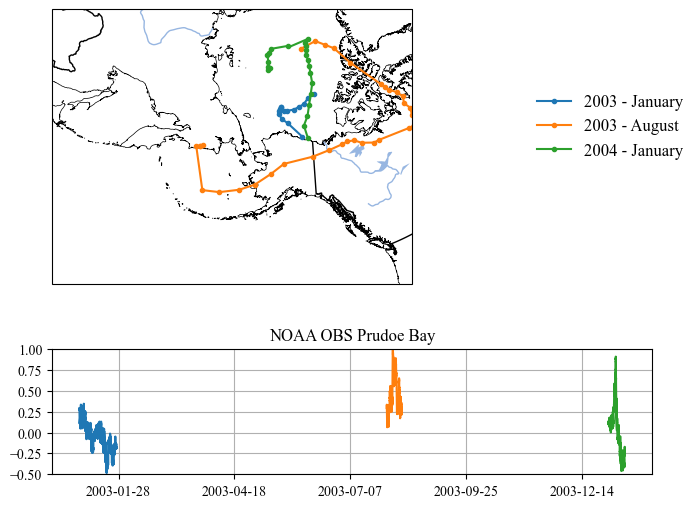

In [29]:
interval='h'
station=9497645

# map boundary ------------------------------------------------------------------------
lat1,lat2 = 45,90
lon1,lon2 = -240,-120

# -------------------------------------------------------------------------------------
plt.rcParams["font.family"] = "Times New Roman"
fig = plt.figure(figsize=(6,5))
proj = ccrs.NorthPolarStereo(central_longitude=-145)
ax1= plt.axes([0,0.28,0.6,0.75],projection=proj)
ax2 = plt.axes([0.,0.,1,0.25])

cmap = mpl.cm.get_cmap('jet')
fig.tight_layout(pad=0.75)



ax1.set_extent([lon1, lon2, lat1, lat2], crs=ccrs.PlateCarree())
ax1.coastlines(resolution='10m',linewidth=0.5)
ax1.add_feature(cart.feature.LAKES)
ax1.add_feature(cart.feature.RIVERS, linestyle="-")
ax1.add_feature(cart.feature.BORDERS.with_scale("50m"), linestyle="-")

start = 2003
end   = 2005
for t in storm['track']:
    noaa = None
    if start <= pd.to_datetime(t['time'][1]).year < end:
        xmin,xmax = -200,-120
        ymin,ymax = 60,90
        bbox1 = Polygon([[xmin,ymin],[xmax,ymin],[xmax,ymax],[xmin,ymax]])
        if ((bbox1.contains(Point(t['lon'][1],t['lat'][1])))&(bbox1.contains(Point(t['lon'][-1],t['lat'][-1])))):
            start2=str(pd.to_datetime(t['time'][1]).year)+str(pd.to_datetime(t['time'][1]).strftime('%m'))+'01'
            end2  =pd.to_datetime(t['time'][-1])
            noaa = json.loads(noaa_data(start2,end2,int(station),interval=interval,t_zone='LST',vdatum='MSL'))            
            if len(noaa)>1:
                ax1.plot(t['lon'],t['lat'],'.-',transform = ccrs.PlateCarree(),\
                        label=f"{pd.to_datetime(t['time'][1]).year} - {pd.to_datetime(t['time'][1]).month_name()}")

                ax2.plot(pd.to_datetime([noaa['data'][i]['t'] for i in range(len(noaa['data']))]),
                        [float(noaa['data'][i]['v']) for i in range(len(noaa['data']))],label='Station 1')
ax1.legend(loc='lower center', bbox_to_anchor=(1.55, 0.4),ncol=1,frameon=False,fontsize=12)
# subplot adjustment -----------------------------------------------------------

ax2.set_title('NOAA OBS Prudoe Bay')
ax2.set_ylim([-0.5,1])
ax2.xaxis.set_major_locator(plt.MaxNLocator(6)),ax2.yaxis.set_major_locator(plt.MaxNLocator(6))
ax2.grid(True)

#plt.savefig('/Users/tmiesse/work/FHRL/arctic/climate_data/era_interim/tracks/jan2004.png',dpi=450,bbox_inches = 'tight', pad_inches = 0.1)
plt.show(fig)

#### Interactive Map with Storm Tracks

In [23]:

f = folium.Figure(width=800, height=400)
m = folium.Map(location=[69.116978, -155.536726],zoom_start=2).add_to(f)

start = 2000
end   = 2006
# Bounding Box Filters
xmin,xmax = -220,-120
ymin,ymax = 20,90

# Apply Filters and Plot tracks--------------------------------------------------------
coords = []
for t in storm['track']:
    
    if start <= pd.to_datetime(t['time'][1]).year < end:
        
        bbox1 = Polygon([[xmin,ymin],[xmax,ymin],[xmax,ymax],[xmin,ymax]])
        if ((bbox1.contains(Point(t['lon'][1],t['lat'][1])))&(bbox1.contains(Point(t['lon'][-1],t['lat'][-1])))):
            fg = folium.FeatureGroup(t['id'][0])
            pts = [(t['lat'][i],t['lon'][i]) for i in range(1,len(t['lon']))]
            
            folium.PolyLine(
                locations=pts,color = '#{:06x}'.format(randint(0, 256**3)),
                weight=5,tooltip=f"{pd.to_datetime(t['time'][1]).year} - {pd.to_datetime(t['time'][1]).month_name()}",).add_to(fg)
            fg.add_to(m)
folium.LayerControl().add_to(m)
m         

#### Additional Functions used

In [24]:
def noaa_data(begin,end,station,vdatum='NAVD',interval='6',
                       form='json',t_zone='GMT',unit='metric',product='water_level'):
    if product=='wind':
        api = f'https://api.tidesandcurrents.noaa.gov/api/prod/datagetter?begin_date={begin}&end_date={end}&station={station}'\
        f'&product={product}&time_zone={t_zone}&interval={interval}&units={unit}&application=DataAPI_Sample&format={form}'
    else:
        api = f'https://tidesandcurrents.noaa.gov/api/datagetter?begin_date={begin}&end_date={end}&station={station}'\
             f'&product={product}&application=NOS.COOPS.TAC.WL&datum={vdatum}&interval={interval}&time_zone={t_zone}&units={unit}&format={form}'
    data = requests.get(url=api).content.decode()
    return data
